<a href="https://colab.research.google.com/github/yporquenoahora/EDA/blob/master/src/notebooks/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Viz Playgorund - Personal case</h1>

How you describe yourself, how you really are. 
How far away from the mainstream taste are u?
And me?

That's how I saw myself before this EDA:

Eclectic taste, focus on experimental music, mainly electronic, enjoy the dark new wave from the 80's, psycodelic rock and some happy cheesy songs from time to time

Let´s see how far from reallity I was

In [2]:
%pip install plotly
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\python39\lib\site-packages (1.8.2.2)



In [3]:
import pandas as pd
import numpy as np

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/my_most_listened.csv")#.iloc[:,1:]
df.columns

Index(['Unnamed: 0', 'name', 'artists', 'release_date', 'range', 'id', 'genre',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id.1', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [7]:
dfGenres = pd.read_csv("../data/my_songs_genres.csv").iloc[:,1:]
dfGenres.columns

Index(['adult standards', 'easy listening', 'lounge', 'vocal jazz',
       'space age pop', 'swing', 'torch song', 'american folk revival', 'folk',
       'american modern classical', 'deep adult standards', 'rock-and-roll',
       'rockabilly', 'man's orchestra', 'vocal harmony group', 'exotica',
       'laboratorio', 'library music', 'cowboy western', 'doo-wop',
       'canadian country', 'canadian pop', 'mellow gold', 'soft rock', 'mambo',
       'movie tunes', 'classic soundtrack', 'rhythm and blues', 'big band',
       'jazz clarinet', 'tin pan alley', 'nashville sound',
       'classic italian pop', 'italian adult pop', 'bubblegum pop',
       'sunshine pop', 'novelty', 'soul', 'louisiana blues', 'memphis blues',
       'new orleans blues'],
      dtype='object')

In [94]:
df["release_date"].unique()

array(['2021-12-14', '2014-02-18', '1997-08-28', '2017-11-17',
       '2009-09-28', '2015-11-18', '2006', '2002-07-01', '1982-05-10',
       '1997', '1993-01-01', '2011-09-29', '2010-10-26', '2008-12-09',
       '2014-01-01', '2019-08-02', '2009-09-29', '2010-10-12',
       '2015-10-09', '2012-11-05', '1999-01-12', '2017-01-20',
       '2012-12-07', '2019-12-27', '2009-05-12', '2014-04-14',
       '1959-08-11', '2020-12-11', '2017-06-23', '2009', '1999-01-01',
       '1998-03-31', '1994-06-22', '2016-09-01', '2000', '2021-12-23',
       '1968-01-01', '1993-02-15', '2011-02-15', '2008-07-28',
       '2005-04-04', '1967-12-31', '2010-10-05', '2017', '1993-07-27',
       '2002-01-01', '2006-08-21', '1989-02-22', '1970-04-10',
       '1970-05-08', '1985-06-01', '1964', '2001-04-03', '2007-02-18',
       '1983-01-01', '2015-04-27', '1997-04-13', '2015-06-02',
       '2004-10-19', '2008-01-01', '2018-04-20', '2018-04-17', '1972',
       '2015-11-13', '2020-04-08', '2008-10-21', '1988', '2020

In [8]:
%pip install nbformat==5.1.2

  Using cached nbformat-5.1.2-py3-none-any.whl (113 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.3
    Uninstalling nbformat-5.7.3:
      Successfully uninstalled nbformat-5.7.3
  Rolling back uninstall of nbformat
  Moving to c:\python39\lib\site-packages\nbformat-5.7.3.dist-info\
   from C:\Python39\Lib\site-packages\~bformat-5.7.3.dist-info
  Moving to c:\python39\lib\site-packages\nbformat\
   from C:\Python39\Lib\site-packages\~bformat
Note: you may need to restart the kernel to use updated packages.


Reason for being yanked: Name generation process created inappropriate id values
ERROR: Could not install packages due to an OSError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Python39\\Scripts\\jupyter-trust.exe' -> 'c:\\Python39\\Scripts\\jupyter-trust.exe.deleteme'



In [102]:
sort = df.sort_values("release_date")
sort.rename(columns={"Unnamed: 0":"ranking"}, inplace=True)
sort.set_index("ranking")
sort

,ranking,name,artists,release_date,range,id,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
27,27,I Only Have Eyes for You,The Flamingos,1959-08-11,short_term,3YdKJzcoMZMacISlpY4QoP,0.552,0.313,5,-12.410,...,0.1200,0.303,88.554,audio_features,3YdKJzcoMZMacISlpY4QoP,spotify:track:3YdKJzcoMZMacISlpY4QoP,https://api.spotify.com/v1/tracks/3YdKJzcoMZMa...,https://api.spotify.com/v1/audio-analysis/3YdK...,202773,3
97,97,Stand by Me,Ben E. King,1962-08-20,medium_term,3SdTKo2uVsxFblQjpScoHy,0.650,0.306,9,-9.443,...,0.0707,0.605,118.068,audio_features,3SdTKo2uVsxFblQjpScoHy,spotify:track:3SdTKo2uVsxFblQjpScoHy,https://api.spotify.com/v1/tracks/3SdTKo2uVsxF...,https://api.spotify.com/v1/audio-analysis/3SdT...,180056,4
62,62,Stand by Me,Otis Redding,1964,medium_term,1aj4GXfmEYXfdVZohCpNKu,0.883,0.464,10,-11.251,...,0.0744,0.925,111.548,audio_features,1aj4GXfmEYXfdVZohCpNKu,spotify:track:1aj4GXfmEYXfdVZohCpNKu,https://api.spotify.com/v1/tracks/1aj4GXfmEYXf...,https://api.spotify.com/v1/audio-analysis/1aj4...,172333,4
43,43,Fever,La Lupe,1967-12-31,short_term,1DF9XPespiTUJKh5MRRStG,0.506,0.547,0,-6.395,...,0.0990,0.744,98.837,audio_features,1DF9XPespiTUJKh5MRRStG,spotify:track:1DF9XPespiTUJKh5MRRStG,https://api.spotify.com/v1/tracks/1DF9XPespiTU...,https://api.spotify.com/v1/audio-analysis/1DF9...,165213,4
90,90,Fever,La Lupe,1967-12-31,medium_term,1DF9XPespiTUJKh5MRRStG,0.506,0.547,0,-6.395,...,0.0990,0.744,98.837,audio_features,1DF9XPespiTUJKh5MRRStG,spotify:track:1DF9XPespiTUJKh5MRRStG,https://api.spotify.com/v1/tracks/1DF9XPespiTU...,https://api.spotify.com/v1/audio-analysis/1DF9...,165213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,50,Mon Amour - Remix,zzoilo,2021-12-14,medium_term,5TAbg7lJkmo1ZO8pCNhchW,0.748,0.761,2,-6.621,...,0.0984,0.362,116.041,audio_features,5TAbg7lJkmo1ZO8pCNhchW,spotify:track:5TAbg7lJkmo1ZO8pCNhchW,https://api.spotify.com/v1/tracks/5TAbg7lJkmo1...,https://api.spotify.com/v1/audio-analysis/5TAb...,179940,4
0,0,Mon Amour - Remix,zzoilo,2021-12-14,short_term,5TAbg7lJkmo1ZO8pCNhchW,0.748,0.761,2,-6.621,...,0.0984,0.362,116.041,audio_features,5TAbg7lJkmo1ZO8pCNhchW,spotify:track:5TAbg7lJkmo1ZO8pCNhchW,https://api.spotify.com/v1/tracks/5TAbg7lJkmo1...,https://api.spotify.com/v1/audio-analysis/5TAb...,179940,4
101,101,Ay Mamá,Rigoberta Bandini,2021-12-23,long_term,0khVEzctbwmqLvOpg1ecbg,0.687,0.560,1,-6.399,...,0.1460,0.320,126.995,audio_features,0khVEzctbwmqLvOpg1ecbg,spotify:track:0khVEzctbwmqLvOpg1ecbg,https://api.spotify.com/v1/tracks/0khVEzctbwmq...,https://api.spotify.com/v1/audio-analysis/0khV...,181695,4
68,68,Ay Mamá,Rigoberta Bandini,2021-12-23,medium_term,0khVEzctbwmqLvOpg1ecbg,0.687,0.560,1,-6.399,...,0.1460,0.320,126.995,audio_features,0khVEzctbwmqLvOpg1ecbg,spotify:track:0khVEzctbwmqLvOpg1ecbg,https://api.spotify.com/v1/tracks/0khVEzctbwmq...,https://api.spotify.com/v1/audio-analysis/0khV...,181695,4


In [49]:
# prepare data frame
#df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

trace10 = go.Bar(x=df["release_date"], y=df["instrumentalness"], name="energy",
      hovertemplate="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% "contestant")
# Creating trace1
trace1 = go.Scatter(
                    x = sort['release_date'],
                    y = sort['energy'],
                    name = 'energy',
                    mode= 'lines',
                    marker = dict(color = 'rgba(160, 112, 2, 0.8)'),
                    text = sort['energy'])

trace2 = go.Scatter(
                    x = sort['release_date'],
                    y = sort['loudness'],
                    name = 'loudness',
                    mode= 'lines',
                    marker = dict(color = 'rgba(1, 112, 2, 0.8)'),
                    text = sort['loudness'])
trace3 = go.Scatter(
                    x = sort['release_date'],
                    y = sort['speechiness'],
                    name = 'speechiness',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 12, 2, 0.8)'),
                    text = sort['speechiness'])
trace4 = go.Scatter(
                    x = sort['release_date'],
                    y = sort['acousticness'],
                    name = 'acousticness',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 2, 2, 0.8)'),
                    text = sort['acousticness'])
trace5 = go.Scatter(
                    x = sort['release_date'],
                    y = sort['tempo'],
                    name = 'tempo',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 52, 2, 0.8)'),
                    text = sort['name'])

trace6 = go.Scatter(
                    x = sort['release_date'],
                    y = sort['valence'],
                    name = 'valence',
                    mode= 'lines',
                    marker = dict(color = 'rgba(46, 112, 2, 0.8)'),
                    text = sort['name'])

trace7 = go.Scatter(
                    x = sort['release_date'],
                    y = sort['instrumentalness'],
                    name = 'instrumentalness',
                    mode= 'lines',
                    marker = dict(color = 'rgba(96, 112, 2, 0.8)'),
                    text = sort['name'])





data = [trace1,trace3,trace4,trace6,trace7, trace10]

layout = dict(title = 'Evolucion de la energia',
             xaxis= dict(title= '',ticklen=5, ticks="outside", tickson="boundaries",), 
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)






In [86]:
# import graph objects as "go"
import plotly.graph_objs as go

trace10 = go.Scatter(x=df["release_date"], y=df["loudness"], name="loudness", mode="markers")
# Creating trace1

data = [trace1,trace3,trace4,trace6,trace7, trace10]

layout = dict(title = 'Evolucion de la loudness',
             xaxis= dict(title= '',ticklen=.05, ticks="outside", tickson="boundaries"), 
           )

fig = go.Figure(data = data, layout=layout)

fig.update_yaxes(title_text="instrumentalness")

fig.show()






In [88]:
%pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

In [16]:
dfGenres.head()

,adult standards,easy listening,lounge,vocal jazz,space age pop,swing,torch song,american folk revival,folk,american modern classical,...,nashville sound,classic italian pop,italian adult pop,bubblegum pop,sunshine pop,novelty,soul,louisiana blues,memphis blues,new orleans blues
0,99,90,95,85,75,85,59,5,5,10,...,91,70,70,99,92,73,85,82,82,82


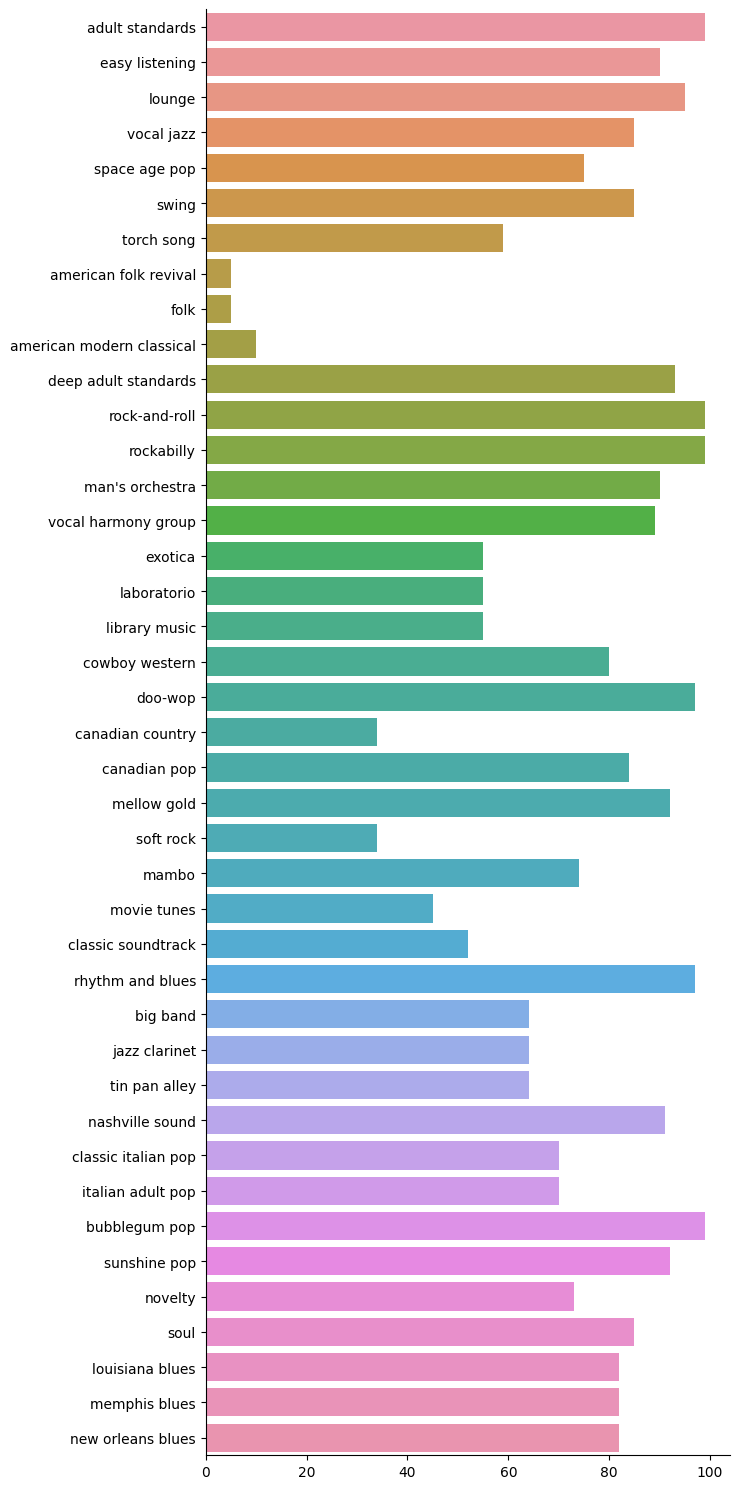

In [25]:
sns.catplot(data = dfGenres, orient="h", kind="bar",height= 15, aspect= .5)